# Trabalho prático II - Classificação

O objetivo deste trabalho é praticar os conceitos de aprendizado supervisionado que vimos em sala.

A sua tarefa será treinar um classificador para um conjunto de dados misterioso (se eu falasses qual é o objetivo do modelo, você encontraria soluções na Internet).

Baixe o arquivo [t2.tar.gz](https://drive.google.com/file/d/125plHKUzFGxHjjCiVJcTQG2bPG_zgDNV/view?usp=sharing). Descoprima este arquivo para encontrar outros quatro. Os arquivos `train_X.csv` e `train_y.csv` possuem os dados que você deve usar para treinar o modelo. O arquivo `test_X.csv` possui os objetos para os quais você deve encontrar as classes (testar o modelo). Por fim, o arquivo `test_example_y.csv` é um exemplo de como sua solução final deve ser organizada.

Cada linha dos arquivos `train_X.csv` e `test_X.csv` tem 15 campos descrevendo um objeto misterioso. O campo `id` representa o identificador do objeto, sendo que este campo não deve ser considerado em seu modelo. Os atributos a serem usados no modelo são os 14 campos rotulados de de `a` até `n`. Desses atributos:
- `b`, `d`, `f`, `g`, `h`, `i`, `j` e `n` são categóricos; e
- `a`, `c`, `e`, `k`, `l` e `m` são numéricos.

Cada linha do arquivo `train_y.csv` possui dois campos. O primeiro é o identificador de um objeto do arquivo `train_X.csv` e o segundo é a classe do respectivo objeto (0 ou 1).

Seu objetivo é encontrar as classes dos objetos do arquivo `test_X.csv` e mostrar como chegou em sua solução! Os dados do arquivo de teste foram obtido a partir de uma amostra aleatório do todo. Ou seja, um modelo bem treinado, e sem _overfitting_, em `train_X.csv` e `train_y.csv` se sairá bem em `test_X.csv`.

**Data de entrega:** dia 4 de julho de 2018.

**Grupo:** de até 3 pessoas, mas duas pessoas do mesmo grupo no trabalho 1 não podem pertencer ao mesmo grupo nesse trabalho.

**Valor:** 20% da nota do semestre.

Os três seguintes pontos descrevem o que obrigatoriamente deve ser entregue, com seu respectivo valor.

1 - **[10 pontos]** Este notebook com todo seu código e resultados (números, tabelas e gráficos). Você pode usar qualquer um dos métodos que estudamos ou alguma de suas variações próximas. Se estiver na dúvida se pode usar um método, basta perguntas no Piazza. Comentários e justificativas no notebook não serão considerados para sua nota.
O notebook deve ser enviado para o email do professor.

2 - **[8 pontos]** Um relatório digitado contendo: capa, introdução, metodologia, resultados, conclusão e referências. O relatório deve ter no máximo 10 páginas, com coluna simples, fonte 11, espaçamento 1.5 e margens de 2cm. A seção de metodologia deve conter uma descrição detalhada dos passos seguidos (não incluir código no relatório). A seção de resultados deve conter obrigatoriamente: uma caracterização descritiva dos dados, matriz de confusão das predições, _precision_, _recall_, _F1 score_ e acurácia. Todas as métricas de predição devem ser calculadas a partir dos arquivos de treinamento por meio de validação cruzada.
O relatório deve ser enviado para o email do professor.

3 - **[2 pontos + equivalente a lista extra pela classificação]** A sua predição final do arquivo `test_X.csv` deve ser enviada para o professor por email. O formato deve ser o mesmo do arquivo `train_y.csv`, assim como exemplificado em `test_example_y.csv` (mas repare que as classes desse último arquivo foram gerados de forma aleatória). Em outras palavras, o arquivo a ser entregue deve ter dois campos. O campo `id` é o identificador do objeto em `test_X.csv` e o campo `label` é a classe que seu modelo encontrou para o objeto em questão. A primeira linha do arquivo deve conter os nomes das colunas.
A entrega desse arquivo é obrigatória e vale dois pontos. Além disso, o trabalho com maior _F1 score_ ganhará o equivalente a 100% de uma lista extra. O trabalho com o pior _F1 score_ não ganhará nota extra alguma. Os demais trabalhos terão nota proporcional.
O professor se reserva o direito de anular esse quesito (nota extra) se houver indícios de má conduta durante a competição.

**Kaggle:** Estou tentando criar uma competição para esse trabalho na plataforma _Kaggle_. Se eu conseguir, compartilho o _link_ com você no _Piazza_.

### Bibliotecas

In [34]:
import pandas as pd
import sklearn.feature_selection as features
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree, svm
import numpy as np
import graphviz
import matplotlib.pyplot as plt
import itertools

### Leitura dos arquivos de dados

In [3]:
X = pd.read_csv("data/pd_trainX.csv")
y = pd.read_csv("data/pd_trainY.csv", header=None)
testX = pd.read_csv("data/pd_testX.csv")

X = X.drop(columns=["id"]).values
y = (y.T).values[0]

### Definição de funções

In [41]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks([])
    plt.yticks([])

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [66]:
def create_scores_df(model):
    scores ={"Accuracy Score": [accuracy_score(y_test, model.predict(X_test))],
            "F1 Score": [f1_score(y_test, model.predict(X_test))],
            "Precision Score": [precision_score(y_test, model.predict(X_test))],
            "Recall Score": [recall_score(y_test, model.predict(X_test))]}

    return pd.DataFrame(data=scores)

### Divisão do conjunto de treino/teste e algoritmos

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### Gaussian NB

#### Treino e matriz de confusão

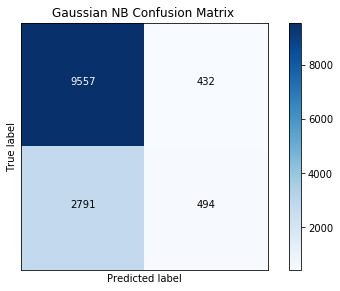

In [75]:
nb = GaussianNB()
nb.fit(X_train, y_train)
    
plot_confusion_matrix(confusion_matrix(y_test, nb.predict(X_test)), title="Gaussian NB Confusion Matrix")

#### Tabela de scores

In [68]:
df_scores_nb = create_scores_df(nb)
df_scores_nb

,Accuracy Score,F1 Score,Precision Score,Recall Score
0,0.757195,0.234624,0.533477,0.150381


### Multinomial NB

#### Treino e matriz de confusão

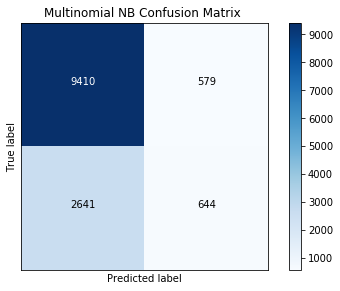

In [74]:
nb_mult = MultinomialNB()
nb_mult.fit(X_train, y_train)

plot_confusion_matrix(confusion_matrix(y_test, nb_mult.predict(X_test)), title="Multinomial NB Confusion Matrix")

#### Tabela de scores

In [71]:
df_scores_nb_mult = create_scores_df(nb_mult)
df_scores_nb_mult

,Accuracy Score,F1 Score,Precision Score,Recall Score
0,0.757421,0.285714,0.526574,0.196043


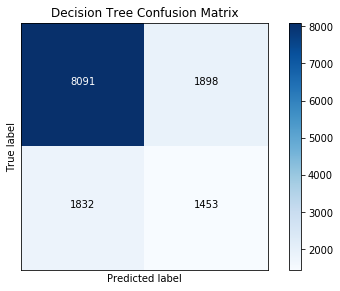

In [76]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

plot_confusion_matrix(confusion_matrix(y_test, dt.predict(X_test)), title="Decision Tree Confusion Matrix")

In [60]:
dot_data = tree.export_graphviz(dt, out_file=None,
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data).view()

In [72]:
df_scores_dt = create_scores_df(dt)
df_scores_dt

,Accuracy Score,F1 Score,Precision Score,Recall Score
0,0.716739,0.434926,0.429504,0.440487


In [14]:
params_rfc = {'n_estimators': list(range(100, 6001, 500))}

rfc = GridSearchCV(RandomForestClassifier(), params_rfc, n_jobs=-1, verbose = 10) 
rfc.fit(X_train, y_train)

plot_confusion_matrix(confusion_matrix(y_test, rfc.predict(X_test)), title="Random Forest Classifier Confusion Matrix")

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.4s finished


0.7692481542865752

[[8813 1176]
 [1887 1398]]

0.47721454173067074

0.5431235431235432

0.42557077625570777


In [ ]:
df_scores_rfc = create_scores_df(rfc)
df_scores_rfc

In [7]:
params_svc = {'C': np.logspace(-10, 10, 5), 'gamma': np.logspace(-10, 10, 5), 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

svc = GridSearchCV(svm.SVC(kernel = 'rbf'), params_svc, n_jobs = -1, verbose = 10)
svc.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.5min finished


0.7574205213198735


In [10]:
vc = VotingClassifier(estimators=[('nb', nb), ('nb_mult', nb_mult), ('dt', dt), ('rfc', rfc), ('svc', svc)], 
                      voting='hard', n_jobs=-1)
vc.fit(X_train, y_train)

print(accuracy_score(y_test, vc.predict(X_test)))

0.7865752599065843


c:\users\gabgo\documents\github\data-mining-w2\venv\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [21]:
mlp = MLPClassifier(solver='lbfgs',
                    hidden_layer_sizes=(5, 2))
mlp.fit(X_train, y_train)

0.7525990658430014

[[9986    3]
 [3281    4]]

0.002430133657351154

0.5714285714285714

0.0012176560121765602


In [28]:
knn = KNeighborsClassifier(n_neighbors=20, n_jobs=-1)
knn.fit(X_train, y_train)

0.7698508362211842

[[9758  231]
 [2824  461]]

0.23183303997988433

0.6661849710982659

0.14033485540334856
